# Load Dataset

In [1]:
import os
import pickle

root = "C:/Users/win8t/OneDrive/Desktop/projects/tlol-ml/dataset/"
dataset_files = os.listdir("./dataset/")
dataset = []
for fi in dataset_files:
    cur_path = os.path.join(root, fi)
    with open(cur_path, "rb") as f:
        cur_df = pickle.load(f)
        dataset.append(cur_df)

# Analyse Dataset

## Rows per Game

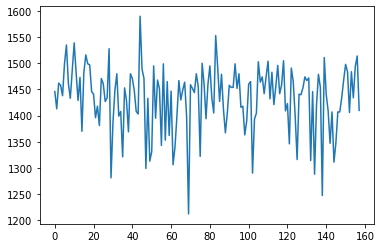

In [2]:
import matplotlib.pyplot as plt
rows = [d.shape[0] for d in dataset]
plt.plot(rows)

## Jinx Data

In [3]:
jinx = dataset[0].iloc[:, 2:67]
jinx.columns

Index(['health_0', 'max_health_0', 'team_0', 'armour_0', 'mr_0',
       'movement_speed_0', 'is_alive_0', 'position_x_0', 'position_y_0',
       'position_z_0', 'is_moving_0', 'targetable_0', 'invulnerable_0',
       'recallState_0', 'q_level_0', 'q_cd_0', 'w_level_0', 'w_cd_0',
       'e_level_0', 'e_cd_0', 'r_level_0', 'r_cd_0', 'd_level_0', 'd_cd_0',
       'd_summoner_spell_type_0', 'f_level_0', 'f_cd_0',
       'f_summoner_spell_type_0', 'crit_0', 'critMulti_0', 'level_0', 'mana_0',
       'max_mana_0', 'ability_haste_0', 'ap_0', 'lethality_0', 'experience_0',
       'mana_regen_0', 'health_regen_0', 'attack_range_0', 'current_gold_0',
       'total_gold_0', 'prev_position_x_0', 'prev_position_y_0',
       'prev_position_z_0', 'position_x_delta_0', 'position_z_delta_0',
       'position_x_z_delta_0', 'position_x_delta_digital_0',
       'position_z_delta_digital_0', 'q_prev_cd_0', 'w_prev_cd_0',
       'e_prev_cd_0', 'r_prev_cd_0', 'd_prev_cd_0', 'f_prev_cd_0', 'q_cast_0',
       

In [11]:
jinx.columns[0:45]

Index(['health_0', 'max_health_0', 'team_0', 'armour_0', 'mr_0',
       'movement_speed_0', 'is_alive_0', 'position_x_0', 'position_y_0',
       'position_z_0', 'is_moving_0', 'targetable_0', 'invulnerable_0',
       'recallState_0', 'q_level_0', 'q_cd_0', 'w_level_0', 'w_cd_0',
       'e_level_0', 'e_cd_0', 'r_level_0', 'r_cd_0', 'd_level_0', 'd_cd_0',
       'd_summoner_spell_type_0', 'f_level_0', 'f_cd_0',
       'f_summoner_spell_type_0', 'crit_0', 'critMulti_0', 'level_0', 'mana_0',
       'max_mana_0', 'ability_haste_0', 'ap_0', 'lethality_0', 'experience_0',
       'mana_regen_0', 'health_regen_0', 'attack_range_0', 'current_gold_0',
       'total_gold_0', 'prev_position_x_0', 'prev_position_y_0',
       'prev_position_z_0'],
      dtype='object')

## Abilities per Game

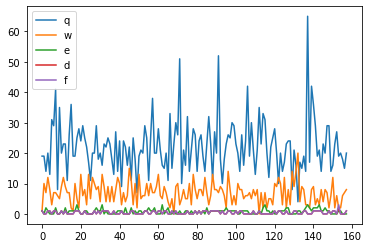

In [4]:
letters = ["q", "w", "e", "d", "f"]
abilities = [[], [], [], [], []]
for game in dataset:
    jinx_acts = game.iloc[:,-20:]
    for i, ab in enumerate(letters):
        cnt = len(jinx_acts[jinx_acts[f"using_{ab}"] == 1.0])
        abilities[i].append(cnt)
for i in range(len(abilities)):
    plt.plot(abilities[i], label=letters[i])
plt.legend(loc="upper left")

## Team

In [5]:
team = {100.0: 0, 200.0: 0}
for game in dataset:
    jinx = game.iloc[:, 2:67]
    cur_team = jinx.iloc[0]["team_0"]
    team[cur_team] += 1
team

{100.0: 0, 200.0: 158}

# Build Training Dataset

In [6]:
import numpy as np

trainset_obs  = []
trainset_acts = []
testset_obs   = []
testset_acts  = []

# Movement Prediction
def get_dataset(start, end):
    obs = []
    acts = []
    for example in dataset[start:end]:
        example_obs  = example.iloc[:,:-20].iloc[:,:45 + 2] # (Time, Min_Spawn, Jinx) = 67
        example_obs  = np.array(example_obs)

        example_acts = example.iloc[:,-20:].iloc[:,-2:] # X Digital Move, Z Digital Move
        example_acts = [((act[0] + 4) * 9) + (act[1] + 4)
                        for act in example_acts.values]
        example_acts = np.array(example_acts)

        obs.append(example_obs)
        acts.append(example_acts)
    return obs, acts

"""
# Auto Attack Prediction
def get_dataset(start, end):
    obs = []
    acts = []
    for example in dataset[start:end]:
        example_obs  = example.iloc[:,:-20].iloc[:,:2] # [Time, Min_Spawn], Jinx
        example_obs  = np.array(example_obs)

        example_acts = example.iloc[:,-20:]["using_auto"]
        example_acts = np.array(example_acts)

        obs.append(example_obs)
        acts.append(example_acts)
    return obs, acts
"""

train_split = int(len(dataset) * 0.8)

trainset_obs, trainset_acts = get_dataset(0,  train_split)
testset_obs,  testset_acts  = get_dataset(train_split, int(len(dataset)))

In [7]:
trainset_obs[0].shape

(1446, 47)

In [14]:
dataset[0].iloc[:,:-20].iloc[:,:45 + 2].columns

Index(['time', 'minion_spawn_countdown', 'health_0', 'max_health_0', 'team_0',
       'armour_0', 'mr_0', 'movement_speed_0', 'is_alive_0', 'position_x_0',
       'position_y_0', 'position_z_0', 'is_moving_0', 'targetable_0',
       'invulnerable_0', 'recallState_0', 'q_level_0', 'q_cd_0', 'w_level_0',
       'w_cd_0', 'e_level_0', 'e_cd_0', 'r_level_0', 'r_cd_0', 'd_level_0',
       'd_cd_0', 'd_summoner_spell_type_0', 'f_level_0', 'f_cd_0',
       'f_summoner_spell_type_0', 'crit_0', 'critMulti_0', 'level_0', 'mana_0',
       'max_mana_0', 'ability_haste_0', 'ap_0', 'lethality_0', 'experience_0',
       'mana_regen_0', 'health_regen_0', 'attack_range_0', 'current_gold_0',
       'total_gold_0', 'prev_position_x_0', 'prev_position_y_0',
       'prev_position_z_0'],
      dtype='object')

# Train Model

## Defining the Model

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

random_seed = 1
torch.manual_seed(random_seed)

class Model(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Model, self).__init__()
        self.out_dim = out_dim
        self.fc1 = nn.Linear(in_dim, in_dim // 2)
        self.fc2 = nn.Linear(in_dim // 2, in_dim // 4)
        self.fc3 = nn.Linear(in_dim // 4, out_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

## Training the Network

In [9]:
import matplotlib.pyplot as plt
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

in_dim  = trainset_obs[0].shape[1]
# out_dim = 2 # Autoing, or not
out_dim = 81 # Movement prediction (-4, 4) for X, Y

model = Model(in_dim, out_dim).to(device)
in_dim, out_dim

random_seed = 1
torch.manual_seed(random_seed)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

losses    = []
correct_s = []

In [10]:
in_dim

47

In [ ]:
n_epochs = 1000
for epoch in range(1, n_epochs + 1):
    correct = 0
    targets = 0
    for obs, act in zip(trainset_obs, trainset_acts):
        optimizer.zero_grad()
        target = torch.Tensor(act).long().to(device)
        obs = torch.Tensor(obs).to(device)
        outputs = model(obs)
        loss = criterion(outputs, target)
        losses.append(loss.cpu().detach().numpy())
        loss.backward()
        optimizer.step()
        pred = torch.argmax(outputs, dim=1)
        correct += torch.sum(pred == target).cpu().item()
        targets += len(target)
    if epoch % 100 == 0:
        print(loss.item(), correct, targets)
    correct_s.append(correct)
    
# plt.plot(losses)
plt.plot(correct_s)

## Evaluating the Network

tensor([80, 40, 40,  ..., 49, 50, 50], device='cuda:0') tensor([80, 40, 40,  ..., 49, 50, 50], device='cuda:0')
tensor([80, 40, 40,  ..., 49, 49, 49], device='cuda:0') tensor([80, 40, 40,  ..., 49, 49, 49], device='cuda:0')
tensor([80, 40, 40,  ..., 39, 39, 39], device='cuda:0') tensor([80, 40, 40,  ..., 39, 39, 39], device='cuda:0')
tensor([80, 40, 40,  ..., 40, 31, 49], device='cuda:0') tensor([80, 40, 40,  ..., 40, 31, 49], device='cuda:0')
tensor([80, 40, 40,  ..., 40, 39, 49], device='cuda:0') tensor([80, 40, 40,  ..., 40, 39, 49], device='cuda:0')
tensor([80, 40, 40,  ..., 40, 49, 49], device='cuda:0') tensor([80, 41, 40,  ..., 40, 49, 49], device='cuda:0')
tensor([80, 40, 40,  ..., 39, 39, 39], device='cuda:0') tensor([80, 40, 40,  ..., 38, 39, 39], device='cuda:0')
tensor([80, 40, 40,  ..., 49, 40, 40], device='cuda:0') tensor([80, 40, 40,  ..., 49, 40, 40], device='cuda:0')
tensor([80, 40, 40,  ..., 38, 39, 39], device='cuda:0') tensor([80, 40, 40,  ..., 38, 39, 39], device='c

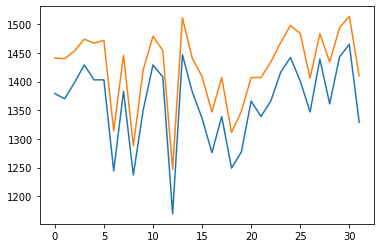

In [326]:
random_seed = 1
torch.manual_seed(random_seed)

model.eval()

correct = []
targets = []
for obs, act in zip(testset_obs, testset_acts):
    target = torch.Tensor(act).long().to(device)
    obs = torch.Tensor(obs).to(device)
    outputs = model(obs)
    loss = criterion(outputs, target)
    pred = torch.argmax(outputs, dim=1)
    correct.append(torch.sum(pred == target).cpu().item())
    targets.append(len(target))
    print(pred, target)
correct_mean = sum(correct) / len(correct)
targets_mean = sum(targets) / len(targets)
print(correct_mean / targets_mean)
plt.plot(correct)
plt.plot(targets)

In [327]:
torch.save(model.state_dict(), "./models/jinx_model.pt")